### What is **Unsupervised Learning**

In supervised learning:

* You have X (data) + y (labels)

* Example: emails -> spam / ham

In unsupervised learning:

* You have ONLY X

* No labels

The model tries to discover structure

Typical goals:

* Group similar things (clustering)

* Compress data (dimensionality reduction)

* Detect unusual patterns (anomaly detection)

(For this project, I focus on clustering.)

## Clustering Synthetic Data with K-Means

Real-world intuition

Imagine you have customers, but:

* No categories

* No labels

* Just behavior numbers (age, spending, visits)

You want the algorithm to say:

“These people look similar -> same group”

In [177]:
# Libraries we’ll use
import numpy as np # for math oparations
import matplotlib.pyplot as plt # for visualize

In [178]:
# Create synthetic data

np.random.seed(42)

cluster_1 = np.random.randn(100,2) + np.array([0,0])
cluster_2 = np.random.randn(100,2) + np.array([5,5])
cluster_3 = np.random.randn(100,2) + np.array([0,5])

# Combine all data

X = np.vstack((cluster_1,cluster_2,cluster_3))



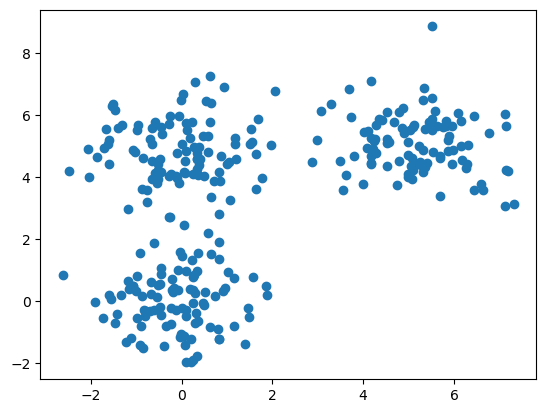

In [179]:
# Visualize raw data

plt.scatter(X[:,0], X[:,1])
plt.show()

### What K-Means actually does

K-Means repeats 3 steps:

1. Pick K centroids (randomly)

2. Assign each point to the nearest centroid

3. Move centroids to the mean of assigned points

Repeat until centroids stop moving

In [180]:
# Distance function

def euclidean_distance(a, b):
    return np.sqrt(np.sum(a - b) ** 2)

In [181]:
# Initialize centroids

def initialize_centroids(X, K):
    indices = np.random.choice(len(X), K, replace=False)
    return X[indices]

In [182]:
# Assign points to nearest centroid

def assign_clusters(X, centroids):
    
    clusters = []

    for point in X:
        distances = [euclidean_distance(point, c) for c in centroids]
        cluster_id = np.argmin(distances)
        clusters.append(cluster_id)

    return np.array(clusters)

In [183]:
# Update centroids

def update_centroids(X, clusters, K):
    new_centroids = []
    for k in range(K):
        cluster_points = X[clusters == k]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [184]:
# Full K-Means loop

def kmeans(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids


In [185]:
# Run the algorithm
K = 3
clusters, centroids = kmeans(X, K)


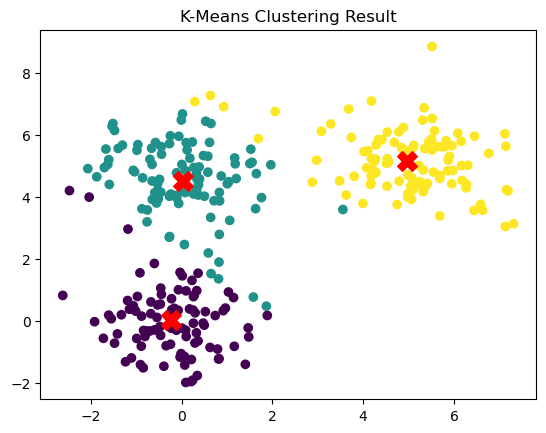

In [186]:
# Visualize result
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering Result")
plt.show()
